In [120]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn
import numpy as np

In [121]:
stock = ["TSLA", "NFLX", "AAPL"]

data = yf.download(stock, start= "2012-08-01", end = "2022-08-01")


[*********************100%***********************]  3 of 3 completed


In [122]:
data.head()


Adj Close                       Close                        High  \
                 AAPL      NFLX   TSLA       AAPL      NFLX   TSLA       AAPL   
Date                                                                            
2012-08-01  18.529762  7.785714  5.250  21.671785  7.785714  5.250  22.014286   
2012-08-02  18.559689  7.695714  5.220  21.706785  7.695714  5.220  21.810356   
2012-08-03  18.801231  7.701429  5.454  21.989286  7.701429  5.454  22.070715   
2012-08-06  19.010405  8.112857  5.654  22.233929  8.112857  5.654  22.316786   
2012-08-07  18.960331  8.271429  6.050  22.175358  8.271429  6.050  22.321428   

                                   Low                        Open            \
                NFLX   TSLA       AAPL      NFLX   TSLA       AAPL      NFLX   
Date                                                                           
2012-08-01  8.254286  5.598  21.535713  7.728571  5.206  21.996786  8.204286   
2012-08-02  7.955714  5.370  21.437500  7.612857  5.104  21.530001  7.754286   
2012-08-03  7.925714  5.510  21.841429  7.544286  5.348  21.915358  7.837143   
2012-08-06  8.167143  5.740  21.973572  7.730000  5.510  22.046070  7.791429   
2012-08-07  8.495714  6.180  22.072857  8.078571  5.700  22.241785  8.135714   

                      Volume                      
             TSLA       AAPL      NFLX      TSLA  
Date                                              
2012-08-01  5.598  384501600  33832400   7961500  
2012-08-02  5.368  332158400  23945600   6525500  
2012-08-03  5.380  344920800  37295300   6047500  
2012-08-06  5.510  302103200  28527800   7641000  
2012-08-07  5.754  290446800  30769900  11936000

In [123]:
closedStocks = data.loc[:, "Close"].copy()
closedStocks.pct_change()

,AAPL,NFLX,TSLA
Date,,,
2012-08-01,NaN,NaN,NaN
2012-08-02,0.001615,-0.011560,-0.005714
2012-08-03,0.013014,0.000743,0.044828
2012-08-06,0.011126,0.053422,0.036670
2012-08-07,-0.002634,0.019546,0.070039
...,...,...,...
2022-07-25,-0.007398,-0.008755,-0.013995
2022-07-26,-0.008826,-0.021052,-0.035664
2022-07-27,0.034235,0.060025,0.061655


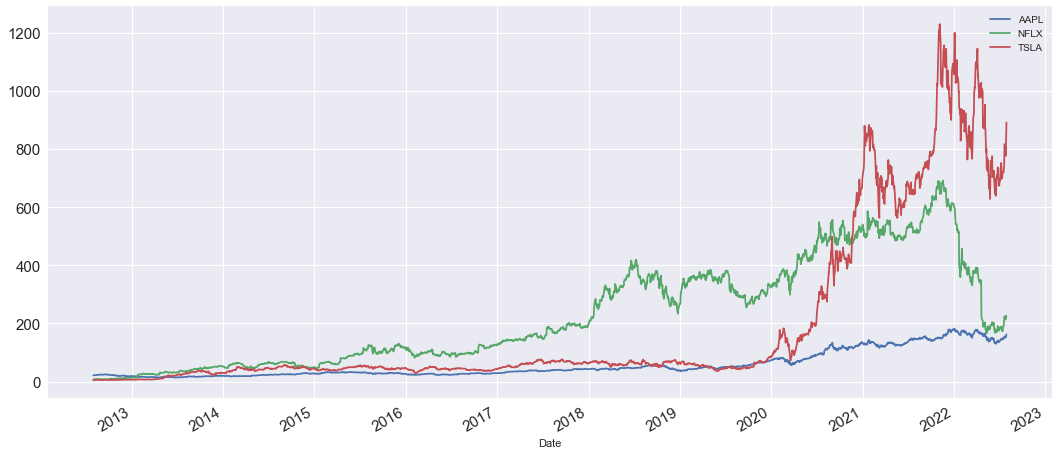

In [124]:
closedStocks.plot(figsize = (18, 8), fontsize = 15)
plt.style.use("seaborn")
plt.show()

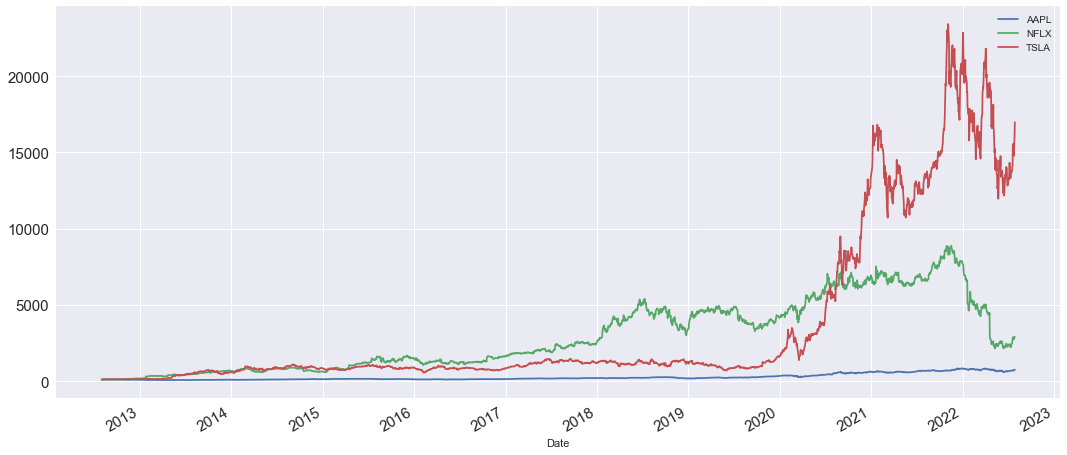

In [125]:
norm = closedStocks.div(closedStocks.iloc[0]).mul(100) #Normalize stock data
norm.plot(figsize = (18, 8), fontsize = 15)
plt.style.use("seaborn")
plt.show()

In [134]:
com = closedStocks.pct_change().dropna() #dropna removes null values
com.describe()

,AAPL,NFLX,TSLA
count,2514.000000,2514.000000,2514.000000
mean,0.000966,0.001794,0.002673
std,0.018119,0.030287,0.035597
min,-0.128647,-0.351166,-0.210628
25%,-0.007436,-0.011782,-0.014471
50%,0.000887,0.000633,0.001527
75%,0.010372,0.014975,0.019237
max,0.119808,0.422235,0.243951


In [135]:
sum = com.describe().T.loc[:, ["mean", "std"]]
sum

,mean,std
AAPL,0.000966,0.018119
NFLX,0.001794,0.030287
TSLA,0.002673,0.035597


In [136]:
sum["mean"] = sum["mean"]*252
sum["std"] = sum["std"] * np.sqrt(252) #multiply the values by the average trading days in a year
sum

,mean,std
AAPL,0.243495,0.287637
NFLX,0.452054,0.480786
TSLA,0.673642,0.565081


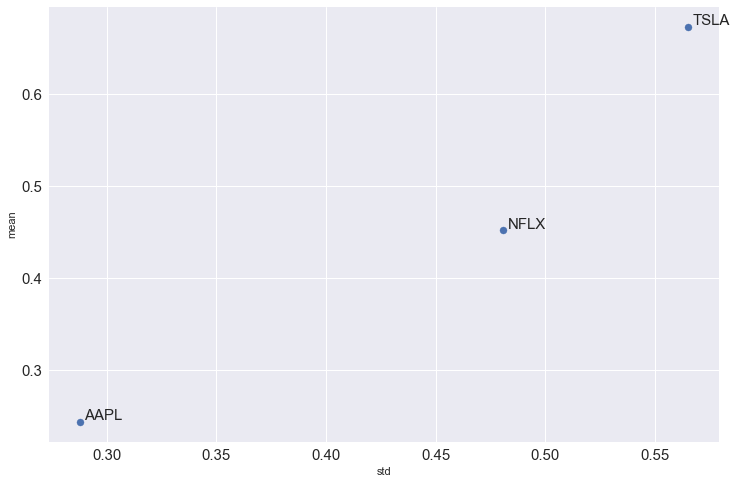

In [137]:
sum.plot.scatter(x = "std", y = "mean", figsize = (12,8), s = 50, fontsize = 15)

for i in sum.index:
 plt.annotate(i, xy=(sum.loc[i, "std"]+0.002, sum.loc[i, "mean"]+0.002), size = 15)

#TSLA is more risky to own than AAPL and NFLX because of a high standard deviation, however the expected return value is higher. 
